### Exploratory Data Analysis (EDA) on Lung Cancer

Following the 10 Steps in a Machine Learning Project, this EDA will cover steps 1 to 5, and a E2E pipeline will be built that takes a user's input to determine on the severity of the patient's lung cancer. <br>
1. Define the purpose of the ML project
2. [Obtain the dataset for the analysis](#Database)
3. [Explore, clean & preprocess the data](#explore)
4. [Dimension reduction & feature engineering](#dimension)
5. Determine the ML task at hand
6. Partition the data (if supervised ML)
7. Choose the ML technique(s)
8. Use the ML techniques
9. Interpret the results
10. Deploy the ML technique


#### Step 1. Define purpose of the ML project.

This project aims to predict the likelihood of lung cancer diagnosis in individuals based on their medical data, sourced from [Kaggle](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link). Early cancer detection is vital for the timely administration of treatments that can significantly enhance survival rates. Three classification models for lung cancer will be developed and checked for optimize performance. This project will be an End-to-end pipeline and uploaded to author's Github. More specificly, the authors is asking whether Air Pollution, Alcohol, Smoking & Risk of Lung Cancer causes lung cancer.


<u>List of Attributes</u> 

| Attribute               | Description                                                               |
|-------------------------|---------------------------------------------------------------------------|
| Age                     | The age of the patient.                                      |
| Gender                  | The gender of the patient.                                   |
| Air Pollution           | The level of air pollution exposure of the patient.          |
| Alcohol use             | The level of alcohol use of the patient.                     |
| Dust Allergy            | The level of dust allergy of the patient.                    |
| OccuPational Hazards    | The level of occupational hazards of the patient.            |
| Genetic Risk            | The level of genetic risk of the patient.                    |
| chronic Lung Disease    | The level of chronic lung disease of the patient.            |
| Balanced Diet           | The level of balanced diet of the patient.                   |
| Obesity                 | The level of obesity of the patient.                         |
| Smoking                 | The level of smoking of the patient.                         |
| Passive Smoker          | The level of passive smoker of the patient.                  |
| Chest Pain              | The level of chest pain of the patient.                      |
| Coughing of Blood       | The level of coughing of blood of the patient.               |
| Fatigue                 | The level of fatigue of the patient.                         |
| Weight Loss             | The level of weight loss of the patient.                     |
| Shortness of Breath     | The level of shortness of breath of the patient.             |
| Wheezing                | The level of wheezing of the patient.                        |
| Swallowing Difficulty   | The level of swallowing difficulty of the patient.           |
| Clubbing of Finger Nails| The level of clubbing of finger nails of the patient.        |
| Frequent Cold           | The level of freqency of cold of the patient                 |
| Dry Cough               | The level of dry cough of the patient                        |
| Snoring                 | The level of snoring of the patient                          |
| Level                   | The level of lung cancer severity of the patient.            |


In [1]:
#Importing necessary library
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd
import numpy as np
import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

<a id="Database"></a>
#### Step 2. Obtain the Database for the Analysis

Using SQLite, a built-in module in Python, the dataset is provided by MYSAR AHMAD BHAT in Kaggle.

In [2]:
connect = sqlite3.connect('data/cancer_patient_data_sets.db')
original_df = pd.read_sql_query('SELECT * FROM cancer_data', connect)
connect.close()

print(original_df.shape)
original_df.head(10)

(1000, 26)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [3]:
original_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

#### Observations:
1. Apart from 'index', 'Patient Id', 'Age', and 'Level', every other column contains pre-processed numerical severity levels.
2. The 'Level' column, serving as the target, categorizes severity into 'Low', 'Medium', and 'High'. 


At first glance, this dataset might appear suitable. However, its pre-processed nature restricts our capability to conduct feature engineering. For EDA, a dataset with raw, real-world data could offer a richer and more engaging experience

<a id="explore"></a>
#### Step 3. Explore, clean & preprocess the data


<u>Explore</u>

In [4]:
pd.set_option('display.max_columns', None)
original_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### Observations: 
1. No outliers found
2. Apart from 'index' and 'Age', Data came scaled

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
original_df['Level'].unique(), original_df['Level'].value_counts().unique()

(array(['Low', 'Medium', 'High'], dtype=object),
 array([365, 332, 303], dtype=int64))

In [7]:
original_df['Patient Id'].duplicated().sum() 

0

#### Observations:
1. The 'Patient Id' and 'Level' columns are of object data type.
2. There are no missing entries in the dataset.
3. The dataset contains unique 'Patient Id' entries, indicating no duplicate records.
4. Based on domain knowledge, 'Patient Id' and 'index' are deemed not useful for analysis.

#### Decisions:
1. Remove 'index' and 'Patient Id' columns due to their lack of relevance to the analysis.
2. Transform the 'Level' column into numerical values and rename it to 'cancer level' to enhance clarity.

In [8]:
# Decision 1
df = original_df.drop(columns=['index', 'Patient Id'])

# Decision 2
df = df.rename(columns={'Level': 'cancer level'})

mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['cancer level'] = df['cancer level'].map(mapping)
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,cancer level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


In [9]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,cancer level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3


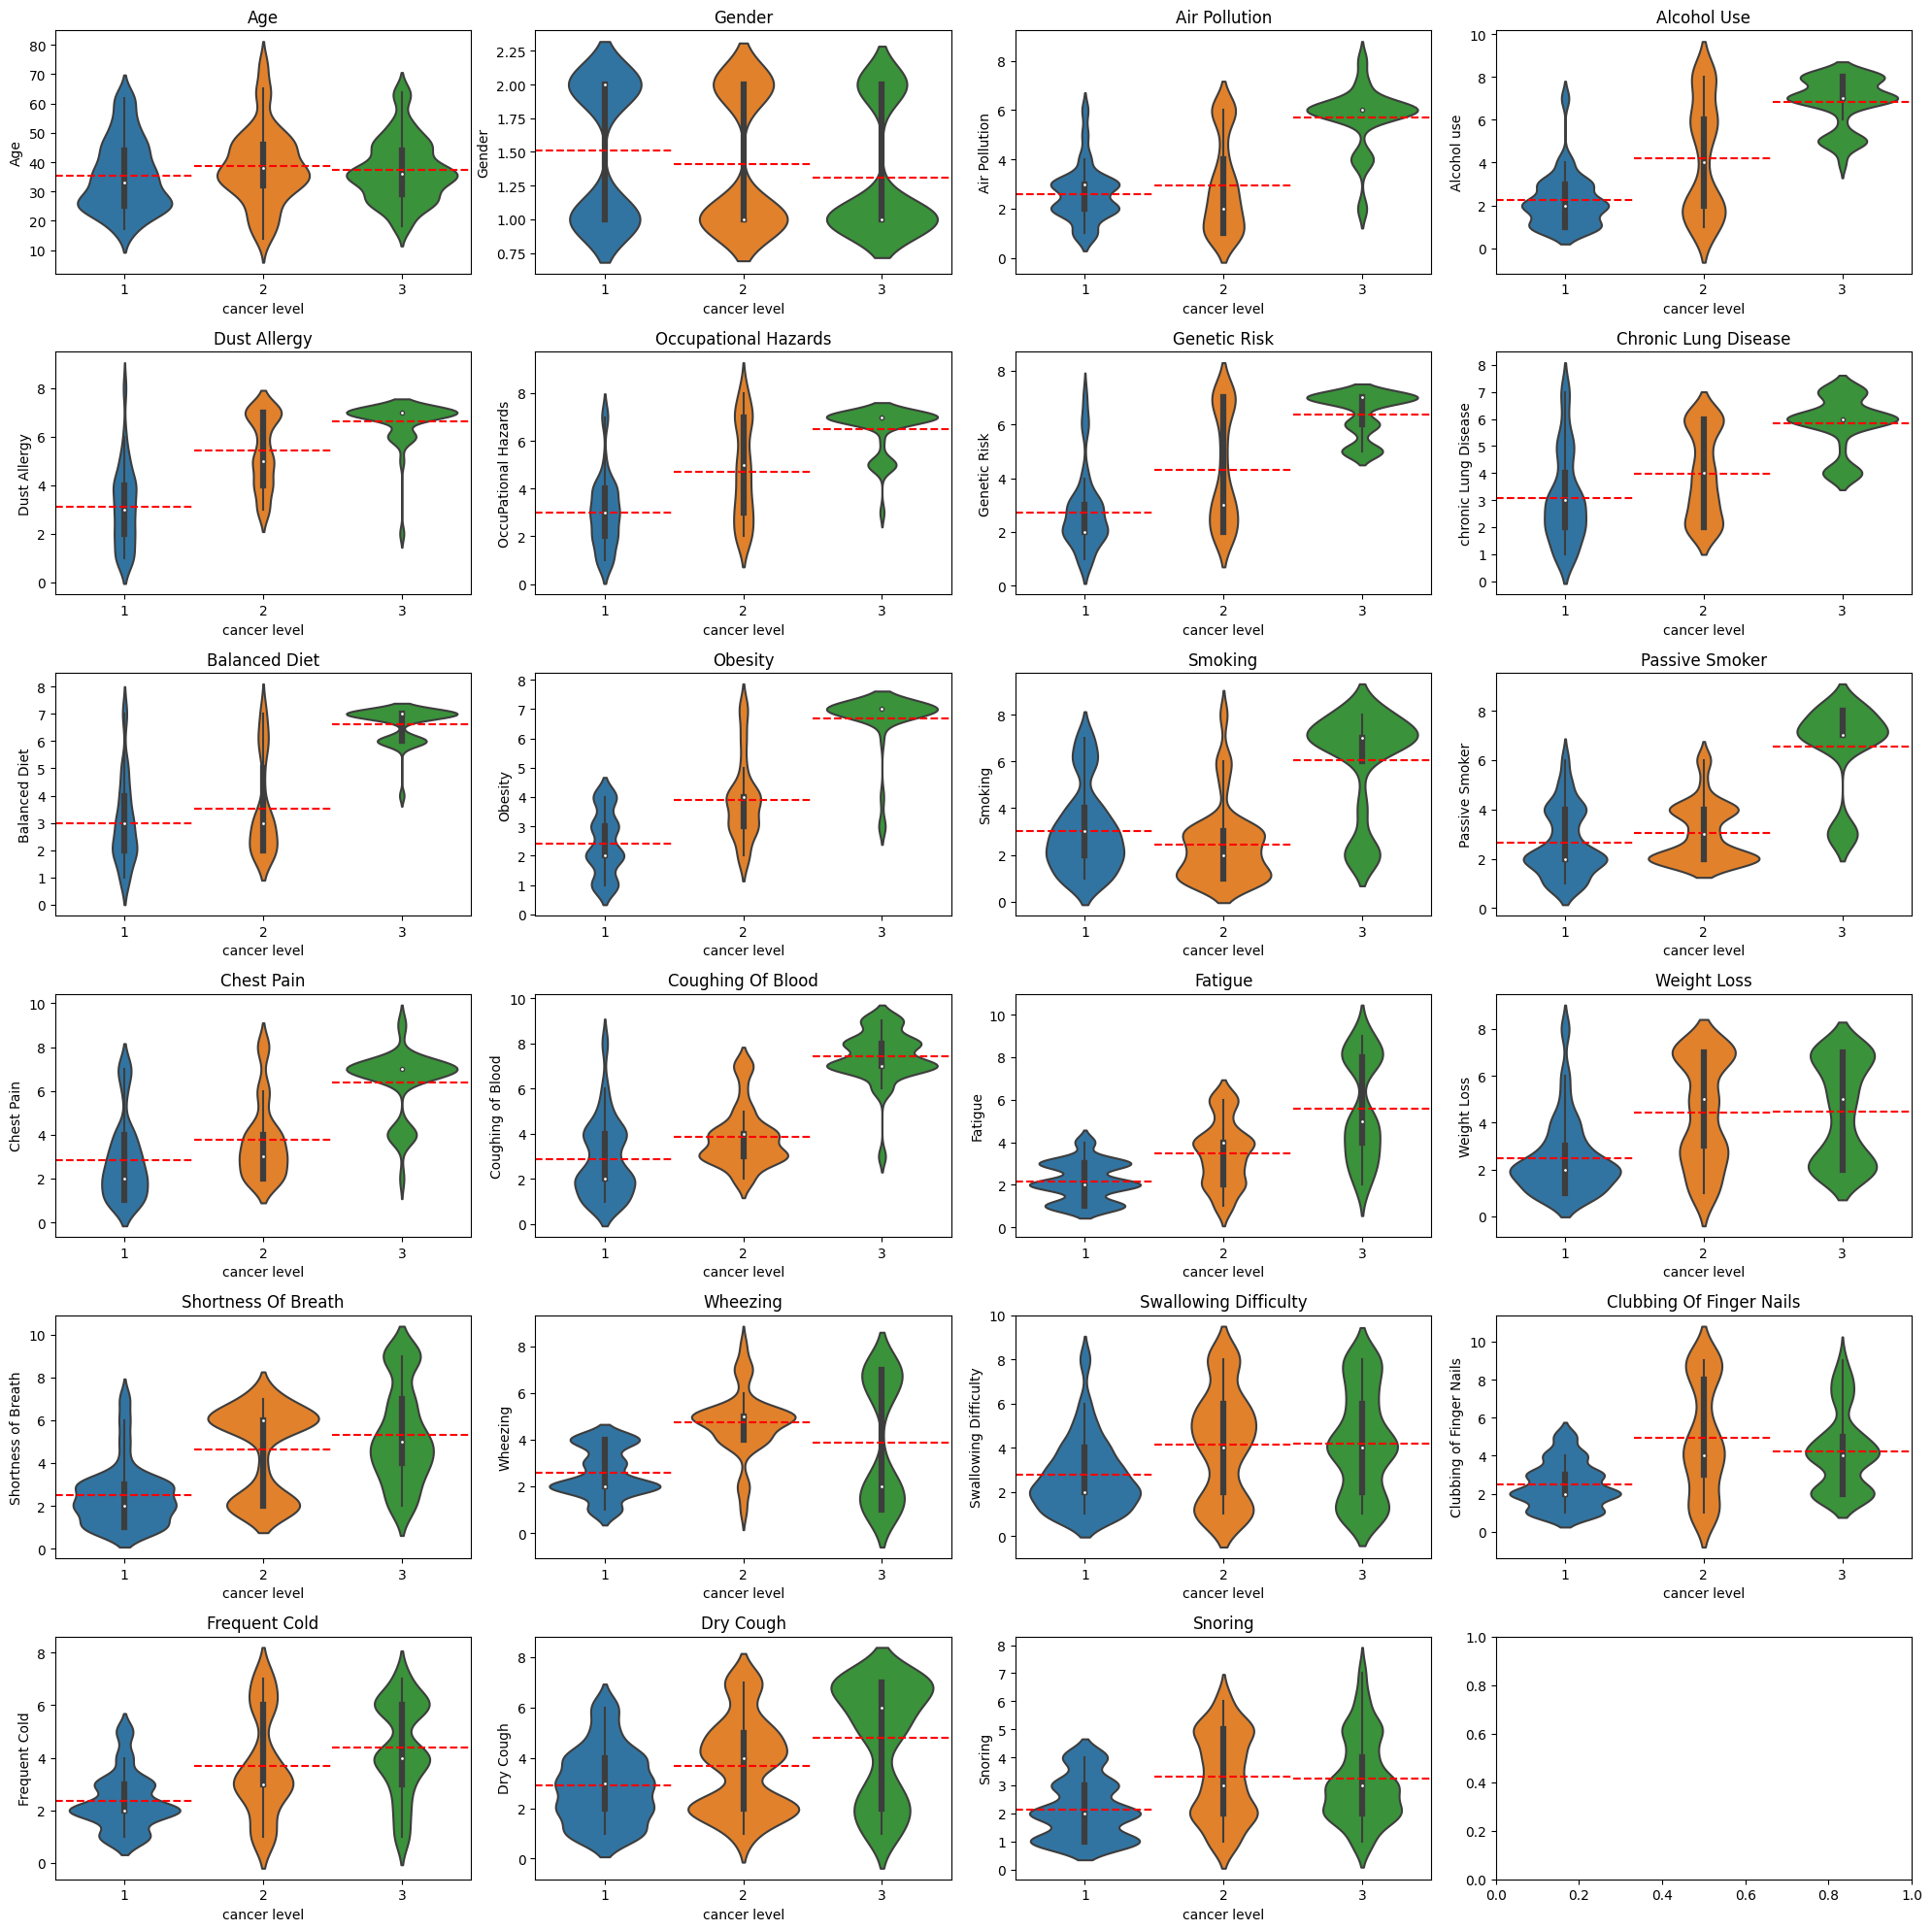

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))  # 24 columns = 4*6
ax = ax.flatten()

for i, col in enumerate([column_names 
                         for column_names in df.columns 
                         if column_names != 'cancer level']): 
    sns.violinplot(x='cancer level', y=col, data=df, ax=ax[i])
    ax[i].set_title(col.title())
    
    # Calculate the mean of the column for each cancer level
    means = df.groupby('cancer level')[col].mean().reset_index()
    for index, row in means.iterrows():
        level_position = index
        ax[i].axhline(y=row[col], xmin=level_position/len(means), 
                      xmax=(level_position+1)/len(means), color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [11]:
df['cancer level'].value_counts(normalize=True) * 100

3    36.5
2    33.2
1    30.3
Name: cancer level, dtype: float64

#### Observation: 
1. The dataset appears well-balanced with respect to the target variable, 'cancer level', as there is no significant class imbalance observed among the three categories labeled as 1, 2, and 3.
2. All features seem to provide some information regarding the target variable since the distributions of data points vary with the 'cancer level'.

<u>Correlation heatmap for features analysis</u> 
- Pearson correlation coefficient, we assume that both X and Y are measured on a continuous scale and that each is approximately normally distributed.
- <b>Spearman</b> rank correlation coefficient is that the X and Y values can be continuous or ordinal, and approximate normal distributions for X and Y are not required.

Since our data consist of ordinal values and do not follow a normal distribution, we have chosen the 'Spearman' correlation for the heatmap.

* Highly Correlated: Often, absolute values greater than 0.7 are considered to indicate a strong correlation. 
* Moderate Correlation: Absolute values between 0.3 and 0.7 can be considered to indicate a moderate level of correlation.
* Weak Correlation: Absolute values below 0.3 often indicate a weak correlation.

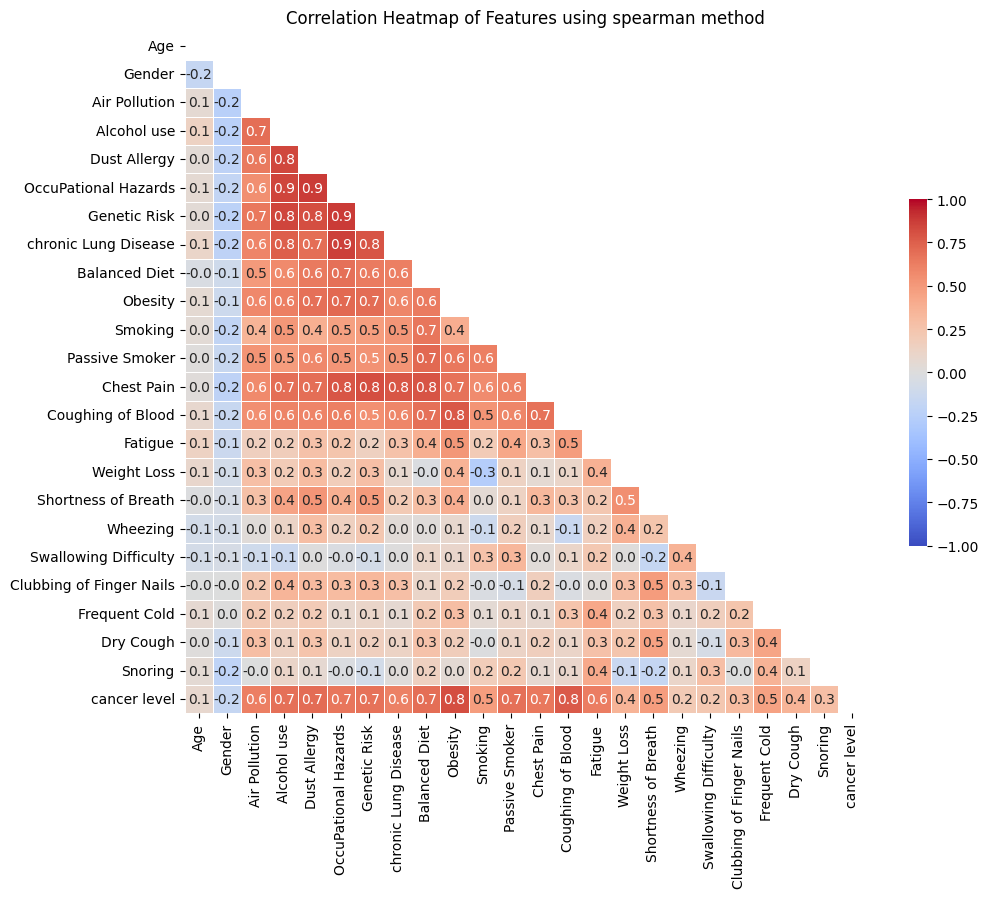

In [12]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Features using spearman method')
plt.show()

#### Observation:
1. The dataset comprises 23 variables, making it relatively high-dimensional.
2. Certain pairs of variables demonstrate a significant correlation.
3. The pre-processing and scaling of data may pose challenges to further feature engineering.

#### Decision:
3. Apply Principal Component Analysis (PCA) for the dual purposes of diminishing multicollinearity and reducing the number of dimensions.

<a id="dimension"></a>
#### Step 4. Dimension reduction & feature engineering

Applying PCA to determine an optimal number of components that retain the majority of the data's variability, thereby ensuring minimal loss of information.

A scree plot facilitates the evaluation of the variance explained by each principal component. While the Kaiser Criterion serves as a guide, suggesting the retention of components with eigenvalues greater than 1. However, it might not always pinpoint the most suitable number of components or factors. Combining the Kaiser Criterion with scree plot analysis allows for a more comprehensive decision-making process.

In [13]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 

In [14]:
y = df['cancer level'].values

    # Get X column
features = df.columns[:-1]  
X = df.loc[:, features].values
    
X_scaled = StandardScaler().fit_transform(X)

    # Apply PCA
pca = PCA(n_components=None)
pca.fit_transform(X_scaled)

    # Get eigenvalues (explained variance) of each component
eigenvalues = pca.explained_variance_
print(f"Top 10 eigenvalues: \n{eigenvalues[:10]}\n")

    # Apply Kaiser Criterion: retain components with eigenvalues > 1
kaiser_criteria_indices = np.where(eigenvalues > 1)[0]
n_components_kaiser = len(kaiser_criteria_indices)
print(f"Number of components to retain based on Kaiser Criterion: \n{n_components_kaiser}")
    
pca_kaiser = PCA(n_components=n_components_kaiser)
X = pca_kaiser.fit_transform(X_scaled)
print(X.shape) 

Top 10 eigenvalues: 
[9.11264256 2.7029169  2.01901303 1.51881237 1.30067581 1.21712537
 0.79135883 0.69141545 0.60588913 0.50996451]

Number of components to retain based on Kaiser Criterion: 
6
(1000, 6)


Top 10 eigenvalues: 
[9.11264256 2.7029169  2.01901303 1.51881237 1.30067581 1.21712537
 0.79135883 0.69141545 0.60588913 0.50996451]

Number of components to retain based on Kaiser Criterion: 
6


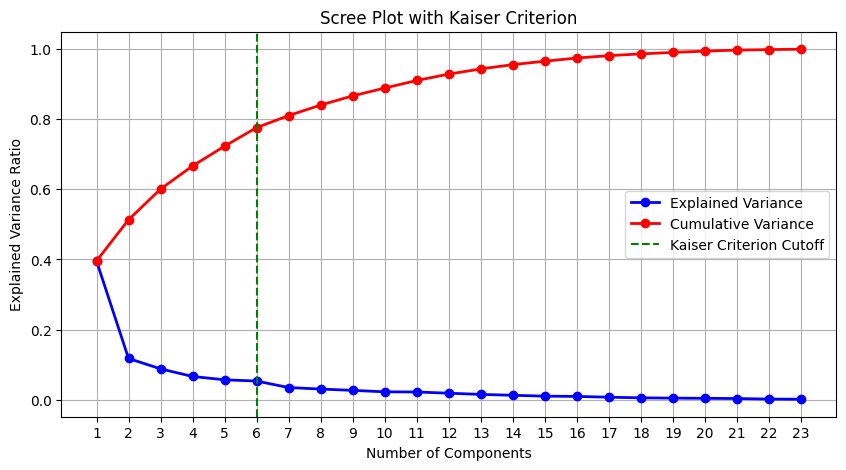

In [15]:
#Decision 3

features = df.columns[:-1]  
X = df.loc[:, features].values
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X, y=None)

# Apply PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(X_scaled, y=None)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Get eigenvalues (explained variance) of each component
eigenvalues = pca.explained_variance_
print(f"Top 10 eigenvalues: \n{eigenvalues[:10]}\n")

# Apply Kaiser Criterion: retain components with eigenvalues > 1
kaiser_criteria_indices = np.where(eigenvalues > 1)[0]
n_components_kaiser = len(kaiser_criteria_indices)
print(f"Number of components to retain based on Kaiser Criterion: \n{n_components_kaiser}")

# # Optional: Recalculate PCA with the selected number of components
# pca_kaiser = PCA(n_components=n_components_kaiser)
# principalComponents_kaiser = pca_kaiser.fit_transform(X_scaled)

# # Optional: Create a scree plot with a line marking the cutoff based on Kaiser Criterion
# explained_variance_kaiser = pca_kaiser.explained_variance_ratio_
# cumulative_variance_kaiser = np.cumsum(explained_variance_kaiser)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2, color='red', label='Cumulative Variance')
plt.axvline(x=n_components_kaiser, color='green', linestyle='--', label='Kaiser Criterion Cutoff')
plt.title('Scree Plot with Kaiser Criterion')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()

The scree plot indicates a notable elbow at the fourth component, suggesting diminishing returns in variance explained thereafter. However, the first four components together explain less than the typically desired threshold of 70% of the variance. 

By extending to six components, we can capture approximately 80% of the variance, striking a balance between dimensionality reduction and information retention.

In [16]:
# Apply PCA to use 6 principal components
pca_kaiser = PCA(n_components=n_components_kaiser)
principalComponents_kaiser = pca_kaiser.fit_transform(X_scaled, y=None)
principalComponents_kaiser.shape

(1000, 6)

Replot heatmap to show correlation between the 6 principal components. We should expect to see weak correlation as these principal components are orthogonal to each other by design.

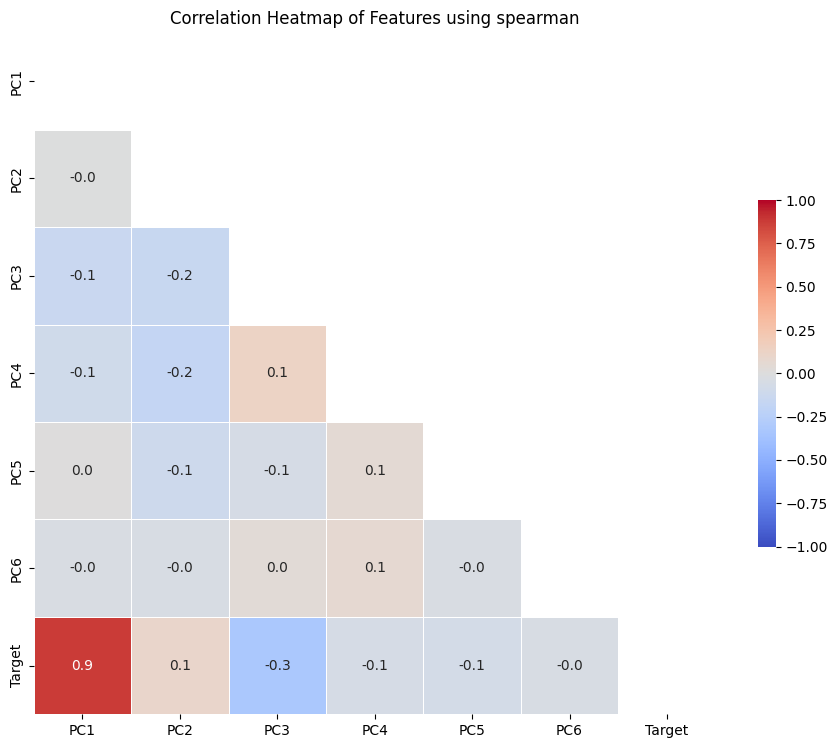

In [17]:
y = df['cancer level'].values
y_reshaped = y.reshape(-1, 1)
corr_test = np.concatenate((principalComponents_kaiser, y_reshaped), axis=1)

# Convert the concatenated array to a pandas DataFrame
corr_test_df = pd.DataFrame(corr_test)
column_names = []
for i in range(principalComponents_kaiser.shape[1]):
    pc_name = f'PC{i+1}'
    column_names.append(pc_name)
column_names.append('Target')
corr_test_df.columns = column_names

# Replot heatmap to show correlation
corr = corr_test_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Features using spearman')
plt.show()

Train a baseline model (logistic regression). 80-20 split for training and testing due to small dataset. Kfold is then utilize to check the varience. 

In [21]:
logistic_model.

LogisticRegression()

In [18]:
# 80-20 split due to limited dataset
X_train, X_test, y_train, y_test = train_test_split(principalComponents_kaiser, y, test_size=0.2, random_state=42)

# Initial Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
print(logistic_model)


y_pred = logistic_model.predict(X_test)

# Initial Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

LogisticRegression()
[[49  6  0]
 [ 0 63  0]
 [ 0  0 82]]
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        55
           2       0.91      1.00      0.95        63
           3       1.00      1.00      1.00        82

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200



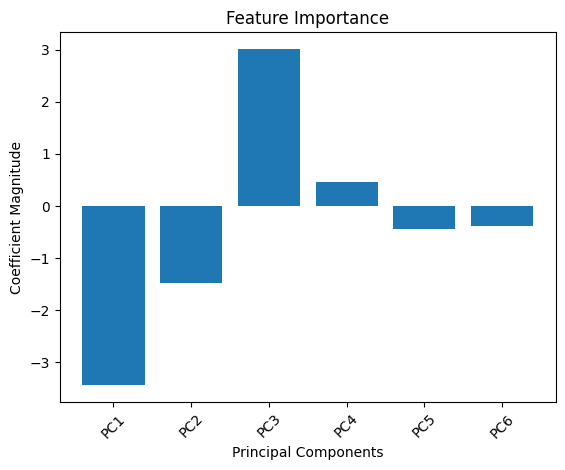

In [19]:
feature_importance = logistic_model.coef_[0]

plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), [f'PC{i+1}' for i in range(len(feature_importance))], rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

### Conclusion

The Kaggle dataset underwent thorough preprocessing, including cleaning and numerical scaling of most features. Given the high correlation among multiple features, Principal Component Analysis (PCA) was utilized. Using both the scree plot and the Kaiser threshold criterion (>1.0), six principal components were selected as inputs for the model. 

Moving forward, an end-to-end pipeline will be constructed and made available on the author's Github repository.